# Cvičení 4b

Tématem tohoto cvičení jsou přímé řešiče soustav lineárních rovnic (LU, LDLT, LDMT, Choleského dekompozice) a jejich výpočetní náročnosti.

## Výpočetní náročnost přímých řešičů 

Připomeňme, kolik aritmetických operací přibližně vyžadují přímé řešiče:
- LU rozklad bez pivotizace: $\frac{2}{3}m^3$
- LDMT rozklad: $\frac{2}{3}m^3$
- LDLT rozklad: $\frac{1}{3}m^3$
- Choleského rozklad: $\frac{1}{2}m^3$
- dopředná a zpětná substituce: $\frac{1}{2}m^2$

V první části cvičení porovnáme výpočetní časy vybraných metod z NumPy a SciPy v závislosti na velikosti vstupní matice.

In [1]:
# importujme potrebne knihovny

import numpy as np
import scipy.linalg
import time
import matplotlib.pyplot as plt

Následující funkce se stará o vykreslování grafu času rozkladu v závislosti na velikosti matice. Na vstupu má 
- pole `mat_sizes` s velikostmi testovaných matic,
- pole `times` stejné velikosti jako `mat_sizes` s časy rozkladů matic o příslušné velikosti,
- string s názvem řešiče, který slouží k vytvoření popisků grafu.

Kód si prostudujte a pokuste se pochopit jeho jednotlivé části. Poté buňku zavolejte, abyste jej mohli využít v další části.

In [2]:
# Vytvoříme funkci pro vykreslení grafu času řešení.

def plot_result(mat_sizes, times, solver_name):
    fig, ax = plt.subplots()

    # pro ilustraci proložíme časy graf funkce x^3, kde za x dosadíme velikosti 
    # faktorizovaných matic - nejdříve vypočítáme hodnoty na této křivce, později je vykreslíme
    compl = mat_sizes ** 3
    fit = compl[-1] / times[-1]
    compl = compl.astype(float)
    compl /= fit    
    compl += times[0]

    # Vykreslíme časy výpočtu v závislosti na velikosti matice
    ax.plot(mat_sizes, times, linewidth=2, label=solver_name)
    # Vykreslíme ilustrační kubickou funkci
    ax.plot(mat_sizes, compl, '--', color=[0.5, 0.5, 0.5], linewidth=2,
            label='$C_{1}m^{3}$')
    
    # Nastavíme postupně nadpis grafu, popisky os x a y
    ax.set_title('Complexity of the {} factorization'.format(solver_name), fontsize=16)
    ax.set_xlabel('Matrix size', fontsize=14)
    ax.set_ylabel('Decomposition time [s]', fontsize=14)

    # Nastavíme rozsah os x a y, zapneme mřížku, vykreslíme legendu
    ax.set_xlim([mat_sizes[0], mat_sizes[-1]])
    ax.set_ylim([0, np.max(times) * 1.1])
    ax.grid(True)
    ax.legend(loc='upper left', fontsize=12)

Nyní již můžeme přikročit k samotnému testování výpočetní náročnosti. V následují buňce si 
- nejdříve vygenerujeme pole s velikostmi testovaných matic od nejmenší po největší,
- vytvoříme pole, do kterých budeme ukládat časy rozkladů jednotlivých matic,
- ve smyčce projdeme přes všechny požadované rozměry matic,
    - vygenerujeme si náhodnou symetrickou pozitivně definitní matici (abychom mohli testovat Choleského rozklad) o požadovaném rozměru,
    - zavoláme postupně LU, LDLT a Choleského rozklad nad vygenerovanou maticí (vygooglete nebo zjistěte v dokumentaci, které metody a z které knihovny je třeba volat),
    - pokaždé uložíme čas řešení na příslušné místo v příslušném poli,
- pomocí výše vytvořené metody vykreslíme grafy časů řešení v závislosti na velikosti matice (porovnejte s vykreslenou kubickou funkcí),
- nakonec do jednoho grafu vykreslíme všechny časy, ať je můžeme navzájem porovnat. 

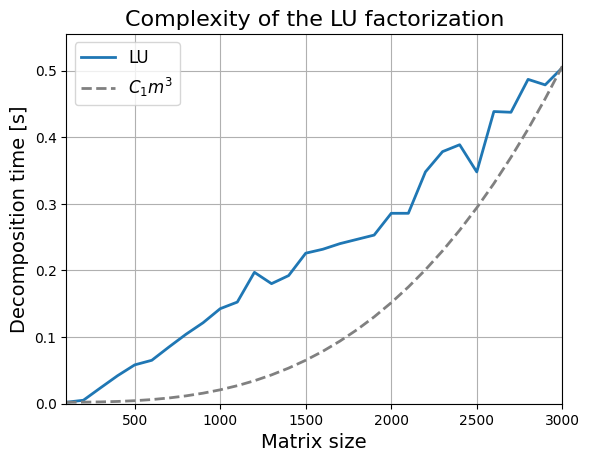

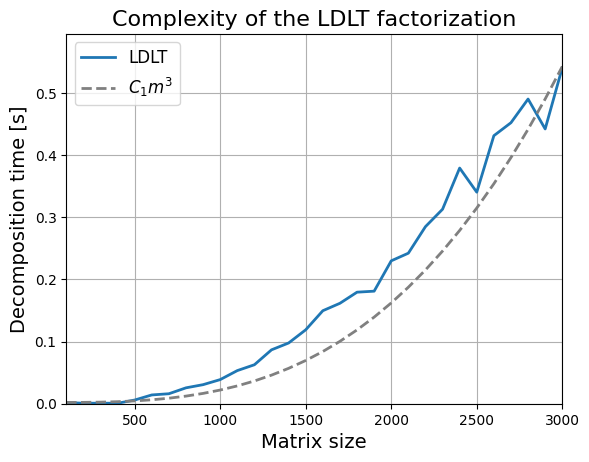

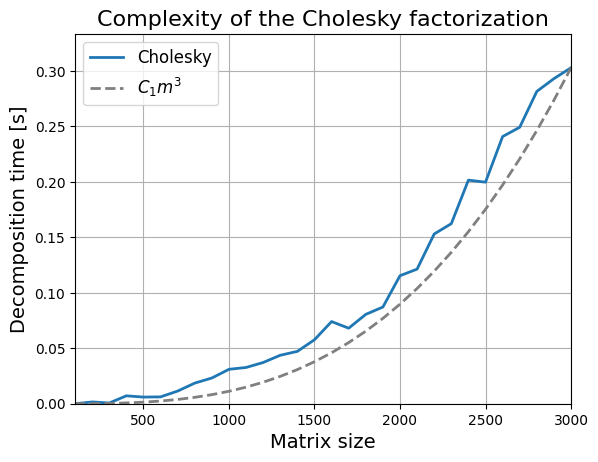

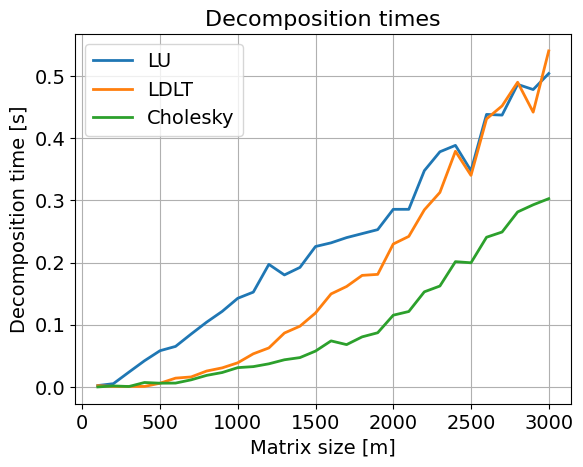

In [126]:
# ÚKOL: Doplňte chybějící kód

# Test vypocetnich narocnosti primych resicu

# Vygenerujeme vektor s rozmery matic
min_m = 100
max_m = 3000
step = 100

# ÚKOL: Použijte metodu arange z NumPy, abyste vygenerovali pole celých čísel 
# mezi min_m a max_m (včetně) s krokem step
mat_sizes = np.arange(min_m, max_m+step, step)

# Predalokujeme si vektory, ve kterych budeme ukladat casy operaci
# Zjistete, k cemu slouzi metoda zeros_like. Proc zde musime explicitne specifikovat 
# datovy typ? (budeme do nich ukladat cas ziskany metodou time(), ktera vraci pocet 
# sekund od jisteho data ve floatu)
t_lu = np.zeros_like(mat_sizes, dtype=np.float64)
t_ldl = np.zeros_like(mat_sizes, dtype=np.float64)
t_chol = np.zeros_like(mat_sizes, dtype=np.float64)
opakovani = 8

for i in range(len(mat_sizes)):
    # zprůměruju to
    suma_lu = 0
    suma_ldl = 0
    suma_chol = 0

    for j in range(opakovani):
        # Vygenerujeme nahodnou symetrickou pozitivne definitni matici
        m = mat_sizes[i]
        A = np.random.rand(m, m)
        A = 0.5*(A + A.T)           # zajisti symetrii
        A = A + m * np.eye(m)       # zajisti diagonalni dominanci (pozitivni def.)

        # LU rozklad
        st = time.time()
        # ÚKOL: doplňte volání funkce, která počítá LU rozklad
        P, L1, U = scipy.linalg.lu(A)
        suma_lu += time.time() - st

        # LDLT rozklad
        st = time.time()
        # ÚKOL: doplňte volání funkce, která počítá LDLT rozklad
        L2, D, perm = scipy.linalg.ldl(A)
        suma_ldl += time.time() - st

        # Choleskeho rozklad
        st = time.time()
        # ÚKOL: doplňte volání funkce, která počítá Choleského rozklad
        L = np.linalg.cholesky(A)
        suma_chol += time.time() - st
    
    t_lu[i] = suma_lu / opakovani
    t_ldl[i] = suma_ldl / opakovani
    t_chol[i] = suma_chol / opakovani

# Vykreslime casy reseni v zavislosti na velikosti matice pro jednotlive resice
plot_result(mat_sizes, t_lu, 'LU')
plot_result(mat_sizes, t_ldl, 'LDLT')
plot_result(mat_sizes, t_chol, 'Cholesky')

# Vykreslime casy LU, LDL a Choleskeho rozkladu do jednoho grafu
fig, ax = plt.subplots()
ax.grid(True)
ax.plot(mat_sizes, t_lu, linewidth=2, label='LU')
ax.plot(mat_sizes, t_ldl, linewidth=2, label='LDLT')
ax.plot(mat_sizes, t_chol, linewidth=2, label='Cholesky')

ax.set_title('Decomposition times', fontsize=16)
ax.set_xlabel('Matrix size [m]', fontsize=14)
ax.set_ylabel('Decomposition time [s]', fontsize=14)
ax.tick_params(axis='both', which='major', labelsize=14)
ax.legend(loc='upper left', fontsize=14)
plt.show()

## Choleského rozklad

Choleského rozklad slouží k rozkladu symetrické pozitivně definitní matice $\mathsf{A}$ na tvar
$$\mathsf{A}=\mathsf{L}^T\mathsf{L},$$
kde $L$ je horní trojúhelníková matice. Můžeme jej popsat např. následujícím pseudokódem:

```
m = size(A)
L = zeros(m)
for k = 1, ..., m do
    w = A(k+1 : m, k)
    A(k+1 : m, k+1 : m) = A(k+1 : m, k+1 : m) - w*w.T/A(k, k)
    L(k,k) = sqrt(A(k,k))
    L(k, k+1 : m) = w.T / sqrt(A(k,k))
end for
```


In [121]:
# ÚKOL: Podobně jako v kódu testující výpočetní náročnost si vygenerujte nějakou 
# testovací matici A, která je symetrická pozitivně definitní (např. symetrickou
# diagonálně dominantní matici).

m = 5
A = np.random.rand(m, m)
A = A @ A.T # vytvoří symetrickou pozitivně definitní matici (proč nám tohle nikdo neřekl??)

np.set_printoptions(precision=3) # pro lepší přehlednost
print(A)

[[1.878 1.735 1.656 1.408 0.531]
 [1.735 2.074 1.435 1.583 0.789]
 [1.656 1.435 2.373 1.621 0.909]
 [1.408 1.583 1.621 1.443 0.82 ]
 [0.531 0.789 0.909 0.82  0.631]]


In [122]:
# Tip: než se pustíte do následujícího úkolu porovnejte, co vrací 
# w = A[k+1 : m, k] 
#vs 
# w = A[k+1 : m, [k]]
# a jak v závislosti na tom dopadne operace w @ w.T (chcete dostat matici, ne skalár)
print(A[1:m, 1])
print(A[1:m, [1]])

[2.074 1.435 1.583 0.789]
[[2.074]
 [1.435]
 [1.583]
 [0.789]]


In [ ]:
# ÚKOL: Implementujte na základě předchozího algoritmu funkci my_chol, která má na vstupu
# symetrickou pozitivně definitní matici A a vrací L.

def my_chol(A):
     """
     Vypočítá Choleského rozklad matice A.
     Vstup: A - pozitivně definitní symetrická matice
     Výstup: L - dolní trojúhelníková matice taková, že platí A = L * L.T
     """
     m, n = np.shape(A)

     if m != n:
          raise ValueError('Matice musí být čtvercová!')

     # opět opraveno pomocí ChatGPT (nemůžu za to, že pseudokód nefunguje, jak má)
     A = np.copy(A)
     L = np.zeros((m, m))

     for k in range(m):
          L[k, k] = np.sqrt(A[k, k])
          L[k+1:m, k] = A[k+1:m, k] / L[k, k]
          A[k+1:m, k+1:m] -= np.outer(L[k+1:m, k], L[k+1:m, k])

     return L


In [124]:
# Ověříme, zda je naše řešení správné.
L = my_chol(A)
print(L)
A2 = L @ L.T
print(A2 - A)

[[ 1.371  0.     0.     0.     0.   ]
 [ 1.266  0.686  0.     0.     0.   ]
 [ 1.208 -0.137  0.946  0.     0.   ]
 [ 1.028  0.412  0.461  0.067  0.   ]
 [ 0.388  0.435  0.53  -0.02   0.103]]
[[0.00e+00 0.00e+00 0.00e+00 0.00e+00 0.00e+00]
 [0.00e+00 0.00e+00 0.00e+00 0.00e+00 0.00e+00]
 [0.00e+00 0.00e+00 0.00e+00 0.00e+00 0.00e+00]
 [0.00e+00 0.00e+00 0.00e+00 2.22e-16 1.11e-16]
 [0.00e+00 0.00e+00 0.00e+00 1.11e-16 1.11e-16]]


In [ ]:
# Bonus: Výše vykreslené grafy nemusí být příliš hladké, časy mohou skákat v závislosti např. na aktuálním
# vytížení systému. Upravte kód tak, aby se grafy kreslily z průměrů časů výpočtu při několika bězích.

# Domácí úkol č. 2

Vašim úkolem bude porovnat výkon vámi implementovaných metod pro LU rozklad a Choleského rozklad podobně, jako jsme porovnávali zabudované SciPy metody v první části tohoto cvičení. Vyjděte tedy z výše implementovaného kódu, který ve smyčce volá rozklady matic, a upravte jej tak, aby volal vaše metody pro LU a Choleského rozklad místo NumPy metod (volání LDLT rozkladu můžete zrušit). Metodu `plot_results` upravovat nemusíte.

**Tip**: Vzhledem k tomu, že vaše metody nejspíš budou méně efektivní než původně volané SciPy metody, budete muset zmenšit maximální velikost testovaných matic.

In [125]:
# Zde si z minulého cvičení zkopírujte vámi implementovanou metodu pro LU faktorizaci
def my_lu(A):
    m = A.shape[0]
    U = np.copy(A)
    L = np.eye(m)

    for k in range(m-1):
        for j in range(k+1, m):
            L[j, k] = U[j, k] / U[k, k]
            U[j, k:m+1] = U[j, k:m+1] - L[j, k] * U[k, k:m+1]
    
    return (L, U)

100
140
180
220
260
300
340
380
420
460
500
540
580
620
660
700
740
780
820
860
900
940
980
1020


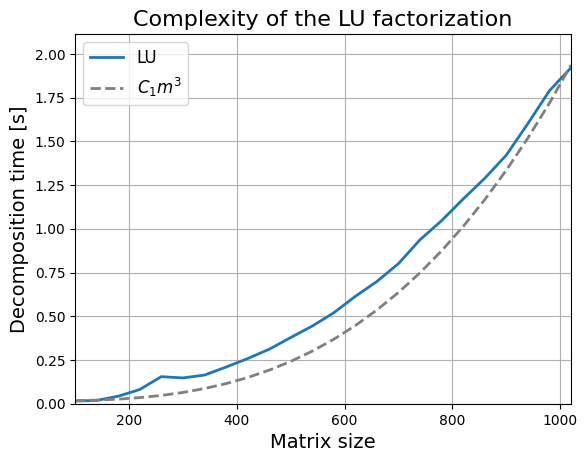

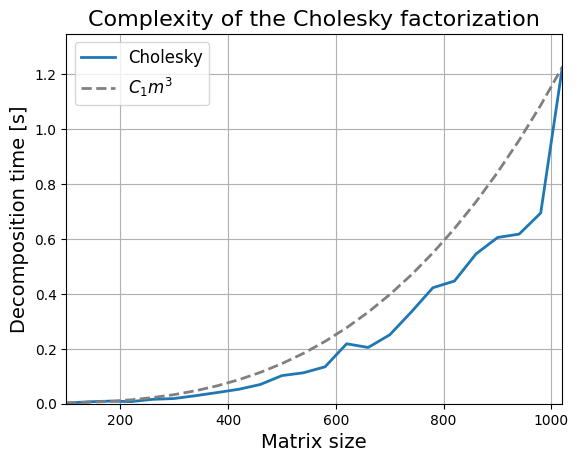

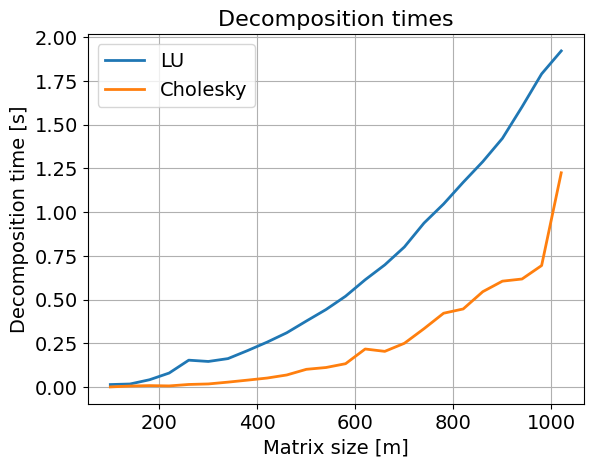

In [133]:
# Zde zkopírujte kód z třetí buňky a upravte jej tak, aby volal vaše metody pro LU a Choleského faktorizaci

# Vygenerujeme vektor s rozmery matic
min_m = 100
max_m = 1000
step = 40
mat_sizes = np.arange(min_m, max_m+step, step)

t_lu = np.zeros_like(mat_sizes, dtype=np.float64)
t_chol = np.zeros_like(mat_sizes, dtype=np.float64)
opakovani = 4

for i in range(len(mat_sizes)):
    print(mat_sizes[i])

    # zprůměruju to
    suma_lu = 0
    suma_chol = 0

    for j in range(opakovani):
        # Vygenerujeme nahodnou symetrickou pozitivne definitni matici
        m = mat_sizes[i]
        A = np.random.rand(m, m)
        A = 0.5*(A + A.T)           # zajisti symetrii
        A = A + m * np.eye(m)       # zajisti diagonalni dominanci (pozitivni def.)

        # LU rozklad
        st = time.time()
        # ÚKOL: doplňte volání funkce, která počítá LU rozklad
        L1, U = my_lu(A)
        suma_lu += time.time() - st

        # Choleskeho rozklad
        st = time.time()
        # ÚKOL: doplňte volání funkce, která počítá Choleského rozklad
        L = my_chol(A)
        suma_chol += time.time() - st
    
    t_lu[i] = suma_lu / opakovani
    t_chol[i] = suma_chol / opakovani

# Vykreslime casy reseni v zavislosti na velikosti matice pro jednotlive resice
plot_result(mat_sizes, t_lu, 'LU')
plot_result(mat_sizes, t_chol, 'Cholesky')

# Vykreslime casy LU, LDL a Choleskeho rozkladu do jednoho grafu
fig, ax = plt.subplots()
ax.grid(True)
ax.plot(mat_sizes, t_lu, linewidth=2, label='LU')
ax.plot(mat_sizes, t_chol, linewidth=2, label='Cholesky')

ax.set_title('Decomposition times', fontsize=16)
ax.set_xlabel('Matrix size [m]', fontsize=14)
ax.set_ylabel('Decomposition time [s]', fontsize=14)
ax.tick_params(axis='both', which='major', labelsize=14)
ax.legend(loc='upper left', fontsize=14)
plt.show()